# **1. Perkenalan Dataset**


Dataset ini memberikan gambaran mendetail tentang perilaku transaksi dan pola aktivitas keuangan, yang ideal untuk mengeksplorasi deteksi kecurangan (fraud detection) dan identifikasi anomali. Dataset ini berisi **2.512 sampel data transaksi**, mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri memberikan wawasan komprehensif tentang perilaku transaksi, memungkinkan analisis untuk keamanan keuangan dan aplikasi deteksi penipuan.

**Fitur Utama:**  
- **TransactionID**: Identifikasi unik berbentuk alfanumerik untuk setiap transaksi.  
- **AccountID**: Identifikasi unik untuk setiap akun, dengan kemungkinan adanya beberapa transaksi dalam satu akun.  
- **TransactionAmount**: Nilai moneter dari setiap transaksi, mulai dari pengeluaran kecil sehari-hari hingga pembelian dalam jumlah besar.  
- **TransactionDate**: Stempel waktu (timestamp) dari setiap transaksi, mencakup tanggal dan waktu.  
- **TransactionType**: Kolom kategori yang menunjukkan jenis transaksi, yaitu **"Credit"** atau **"Debit"**.  
- **Location**: Lokasi geografis tempat transaksi dilakukan, direpresentasikan dalam nama kota di AS.  
- **DeviceID**: Identifikasi alfanumerik untuk perangkat yang digunakan dalam transaksi.  
- **IP Address**: Alamat IPv4 yang terkait dengan transaksi, dengan kemungkinan perubahan sesekali untuk beberapa akun.  
- **MerchantID**: Identifikasi unik untuk pedagang, menunjukkan pedagang yang sering digunakan dan yang tidak biasa bagi setiap akun.  
- **AccountBalance**: Saldo akun setelah transaksi dilakukan, dengan korelasi logis berdasarkan jenis transaksi dan jumlahnya.  
- **PreviousTransactionDate**: Stempel waktu dari transaksi sebelumnya dalam akun, membantu dalam menghitung frekuensi transaksi.  
- **Channel**: Kanal yang digunakan untuk melakukan transaksi (misalnya **Online, ATM, atau Cabang**).  
- **CustomerAge**: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.  
- **CustomerOccupation**: Pekerjaan pemegang akun (misalnya **Dokter, Insinyur, Mahasiswa, Pensiunan**), yang mencerminkan pola pendapatan.  
- **TransactionDuration**: Durasi transaksi dalam hitungan detik, bervariasi tergantung jenis transaksi.  
- **LoginAttempts**: Jumlah percobaan login sebelum transaksi dilakukan, dengan nilai yang lebih tinggi berpotensi menunjukkan anomali.  

**Kegunaan Dataset:**  
Dataset ini sangat cocok untuk **ilmuwan data, analis keuangan, dan peneliti** yang ingin menganalisis pola transaksi, mendeteksi penipuan, serta membangun model prediktif untuk keamanan keuangan. Dataset ini dirancang untuk **tugas machine learning dan analisis pola**, namun **tidak dimaksudkan sebagai sumber data utama untuk publikasi akademik**.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [2]:
# Import Data CSV
df = pd.read_csv('./bank_transactions_data_2.csv') 

#Tampilkan Data
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
2. **Menangani Data yang Hilang**  
3. **Analisis Distribusi dan Korelasi**  
4. **Visualisasi Data** 

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **a. Struktur Data**

In [3]:
# Tinjau Struktur Data
df.info()

# Pisahkan numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['number']) 
categorical_cols = df.select_dtypes(exclude=['number'])  

# Tampilkan hasil
print("\n\nKolom Numerikal:", numerical_cols.columns.tolist())
print("Kolom Kategorikal:", categorical_cols.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## **b. Data Hilang, Duplikat, dan Outlier**

### Data Hilang dan Duplikat

In [4]:
# Cek Data Hilang dan Duplikat
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


### Outlier

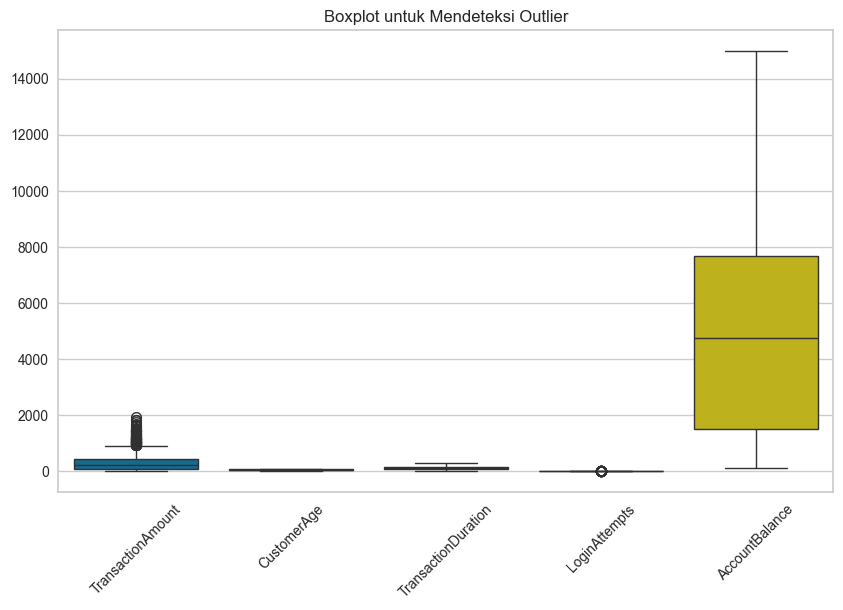

In [5]:
# Cek Outlier

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

## **c. Analisis Distribusi dan Korelasi**

### Statistik Deskriptif

In [6]:
# Statistik Deskriptif Data Numerik

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Distribusi Data Numerik

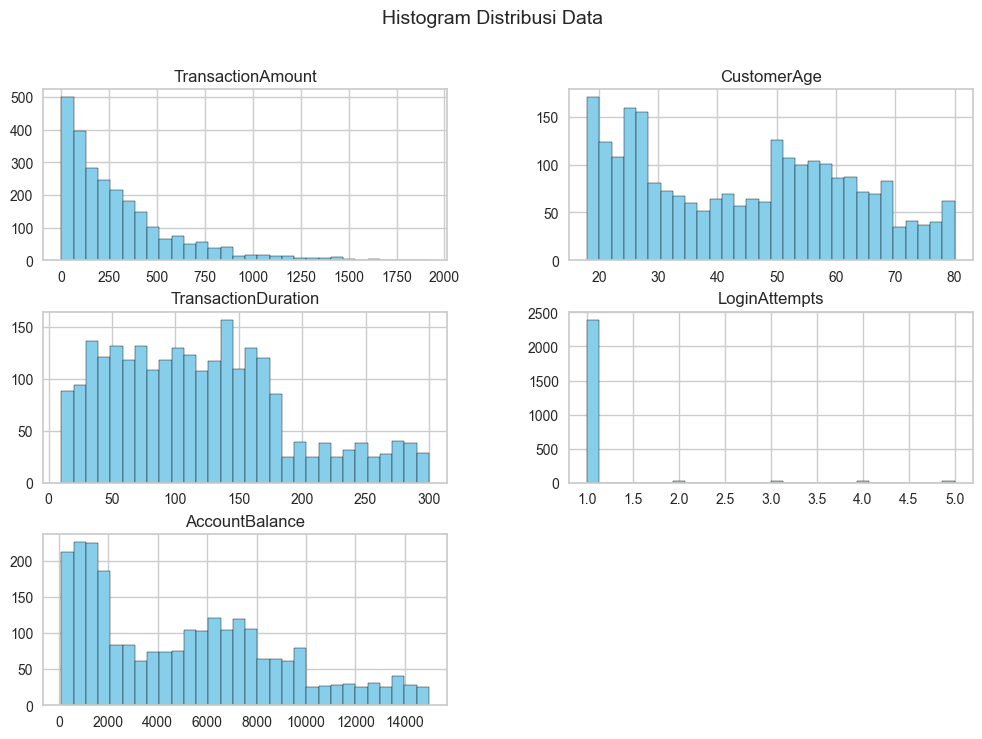

In [7]:
# Histogram Distribusi Data Numerik
numerical_cols.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')

# Tambahkan judul
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

#### Transactions Amount

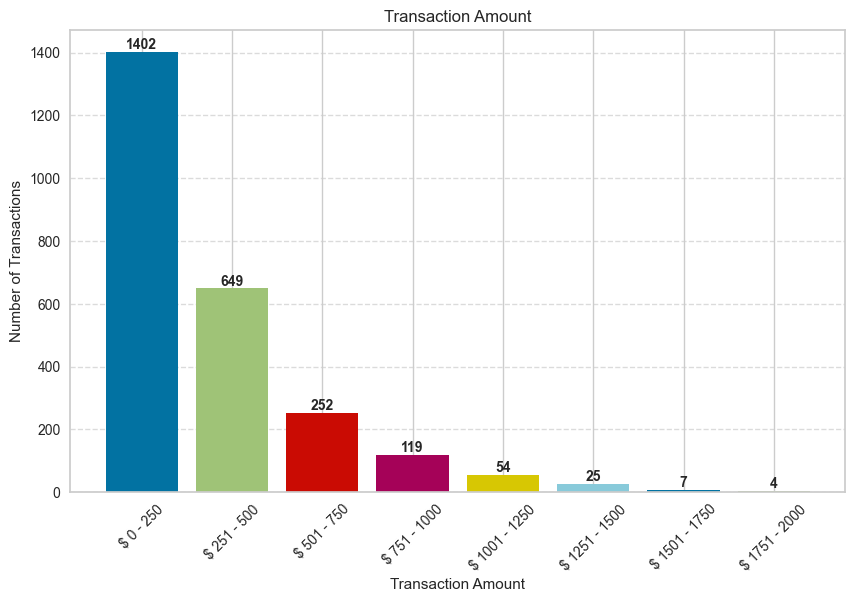

In [8]:
# Definisikan rentang (bins) untuk TransactionAmount
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
labels = ["$ 0 - 250", "$ 251 - 500", "$ 501 - 750", "$ 751 - 1000", "$ 1001 - 1250", "$ 1251 - 1500", "$ 1501 - 1750", "$ 1751 - 2000"]

# Kategorisasi data berdasarkan bins
amount_range = pd.cut(df["TransactionAmount"], bins=bins, labels=labels, right=True)
amount_counts = amount_range.value_counts().reindex(labels, fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(amount_counts.index, amount_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

#### Customers Ages

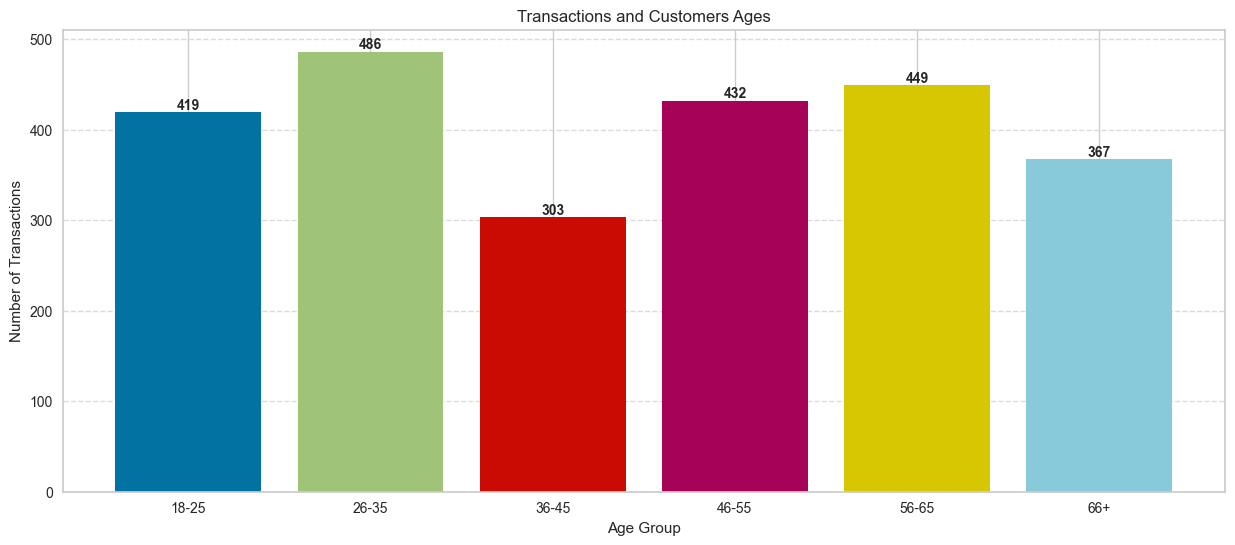

In [9]:
# Definisikan rentang usia (bins)
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Kategorisasi data berdasarkan bins
age_groups = pd.cut(df["CustomerAge"], bins=bins, labels=labels, right=True)
age_counts = age_groups.value_counts().reindex(labels, fill_value=0)

# Plot bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(age_counts.index, age_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transactions and Customers Ages")
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

#### Transactions Login Attempts

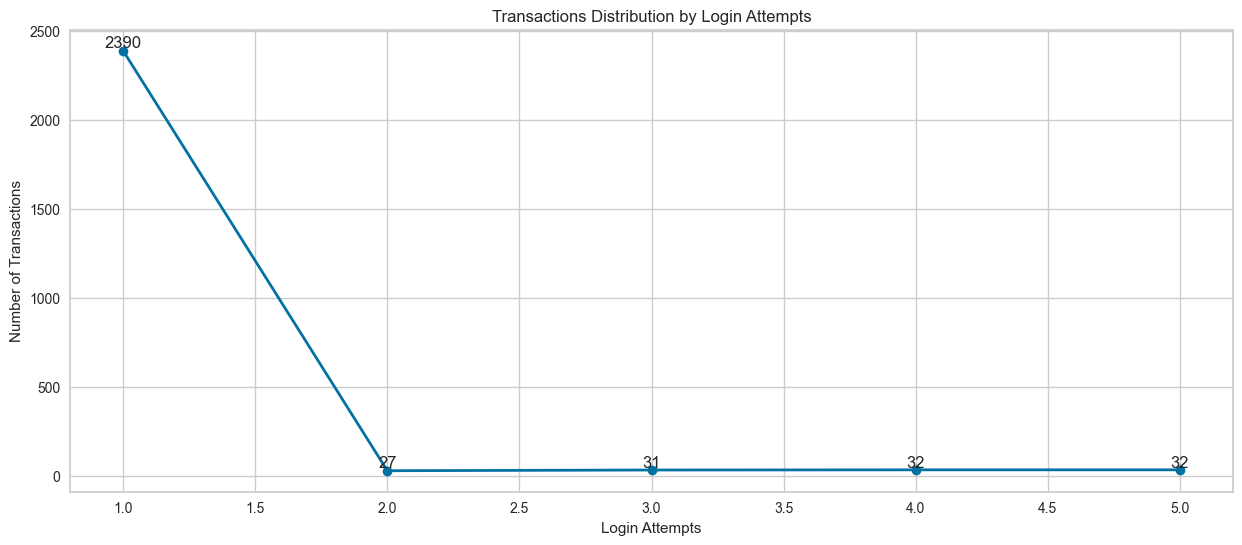

In [10]:
# Hitung jumlah transaksi untuk setiap kategori LoginAttempts
login_attempts = df["LoginAttempts"].value_counts().sort_index()

# Plot data dalam bentuk line chart
plt.figure(figsize=(15, 6))
plt.plot(login_attempts.index, login_attempts.values, marker='o', color='b', linestyle='-', linewidth=2)

# Tambahkan angka di atas setiap titik
for i, value in enumerate(login_attempts.values):
    plt.text(login_attempts.index[i], value, str(value), ha='center', va='bottom')

# Format plot
plt.xlabel("Login Attempts")
plt.ylabel("Number of Transactions")
plt.title("Transactions Distribution by Login Attempts")
plt.grid(True)

# Tampilkan plot
plt.show()

#### Account Balance

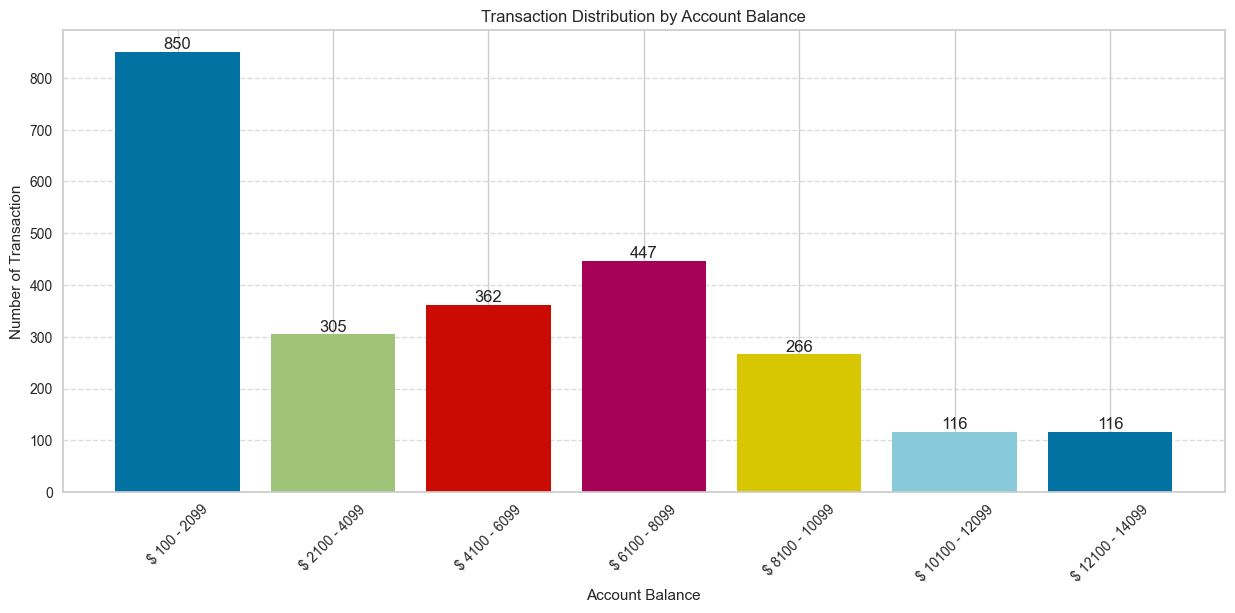

In [11]:
# Definisikan rentang saldo akun (AccountBalance)
bins = list(range(100, 15500, 2000))  # Membuat rentang dari 100 hingga 15000 dengan interval 2000
labels = [f"$ {bins[i]} - {bins[i+1]-1}" for i in range(len(bins)-1)]

# Mengelompokkan transaksi berdasarkan saldo akun
account_balance = pd.cut(df["AccountBalance"], bins=bins, labels=labels, right=False)
balance_counts = account_balance.value_counts().reindex(labels, fill_value=0)

# Plot data dalam bentuk bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(balance_counts.index, balance_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Format plot
plt.title("Transaction Distribution by Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Transaction")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

#### Transactions Durations

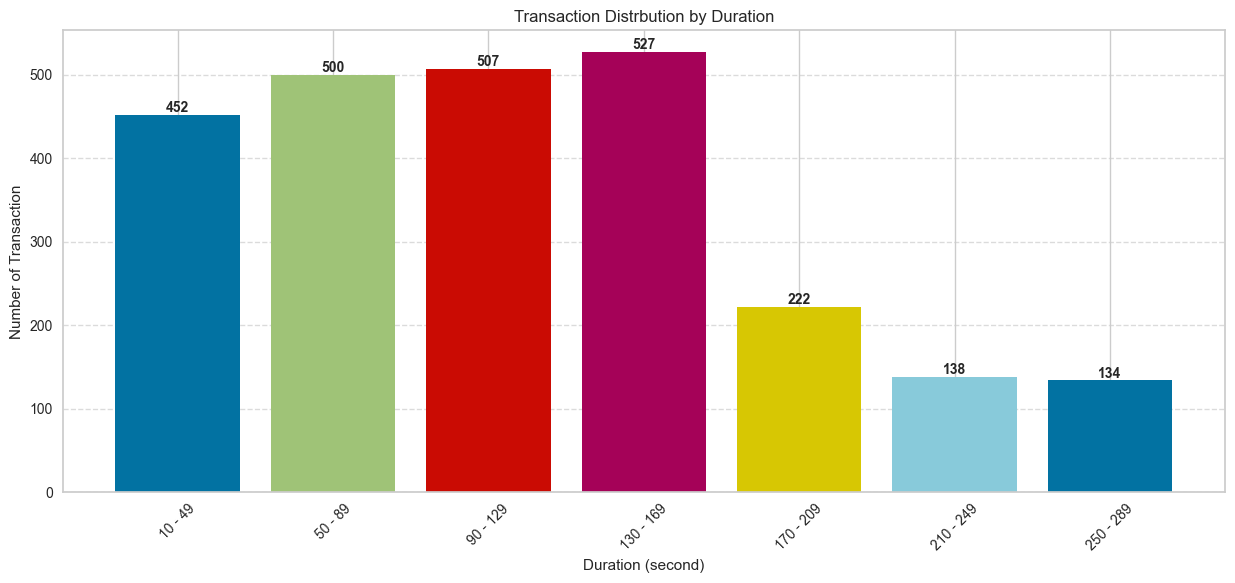

In [12]:
# Definisikan rentang durasi transaksi
bins = list(range(10, 310, 40))  # Membuat rentang dari 10 hingga 300 dengan interval 40
labels = [f"{bins[i]} - {bins[i+1]-1}" for i in range(len(bins)-1)]

# Mengelompokkan transaksi berdasarkan durasi
transaction_duration = pd.cut(df["TransactionDuration"], bins=bins, labels=labels, right=False)
duration_counts = transaction_duration.value_counts().reindex(labels, fill_value=0)

# Plot data dalam bentuk bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(duration_counts.index, duration_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transaction Distrbution by Duration")
plt.xlabel("Duration (second)")
plt.ylabel("Number of Transaction")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

### Matriks Korelasi

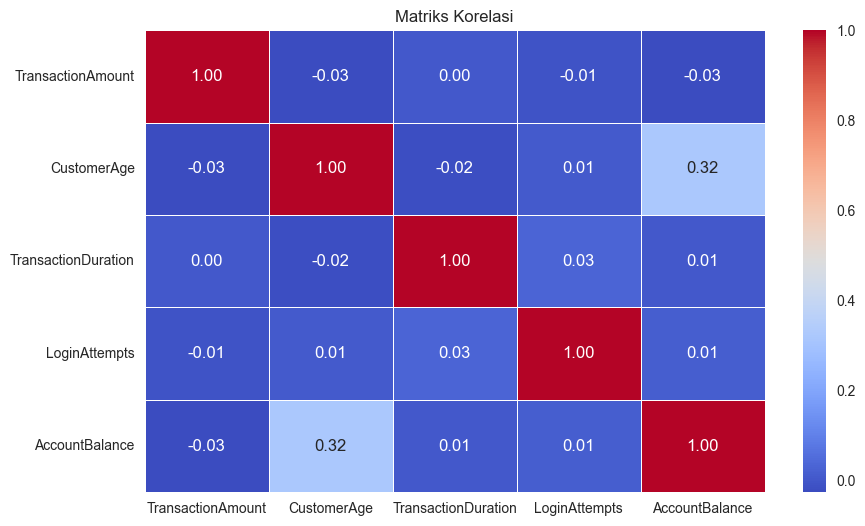

In [13]:
# Hitung matriks korelasi
corr_matrix = numerical_cols.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

## **d. Distribusi Data Kategorikal**

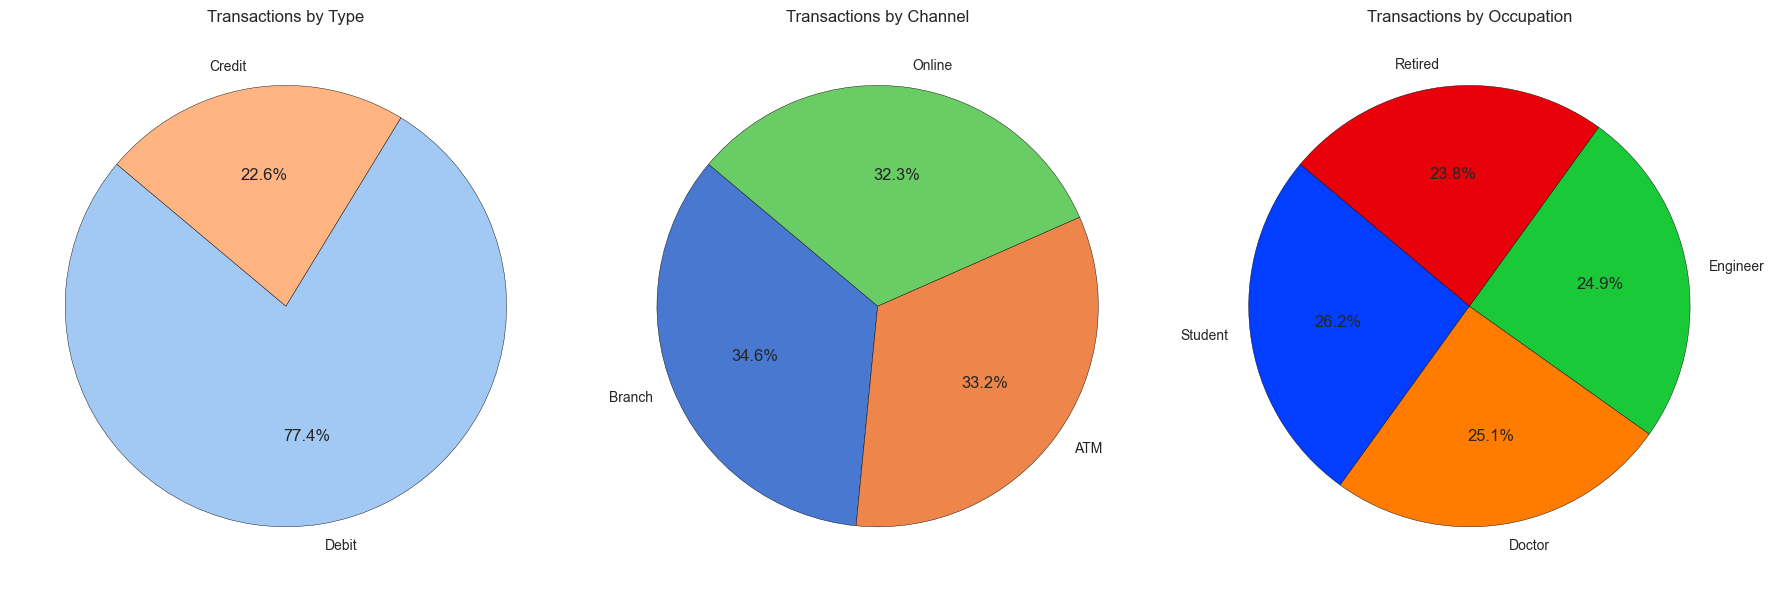

In [14]:
# Daftar kategori yang akan ditampilkan dalam pie chart
categories = ["TransactionType", "Channel", "CustomerOccupation"]
titles = ["Transactions by Type", "Transactions by Channel", "Transactions by Occupation"]
colors = ["pastel", "muted", "bright"]  # Warna untuk setiap pie chart

# Buat figure dengan 1 baris 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop untuk membuat pie chart secara otomatis
for i, category in enumerate(categories):
    data = df[category].value_counts()
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=sns.color_palette(colors[i], len(data)),
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(titles[i])

# Tampilkan layout yang rapi
plt.tight_layout()
plt.show()

### Transactions Date

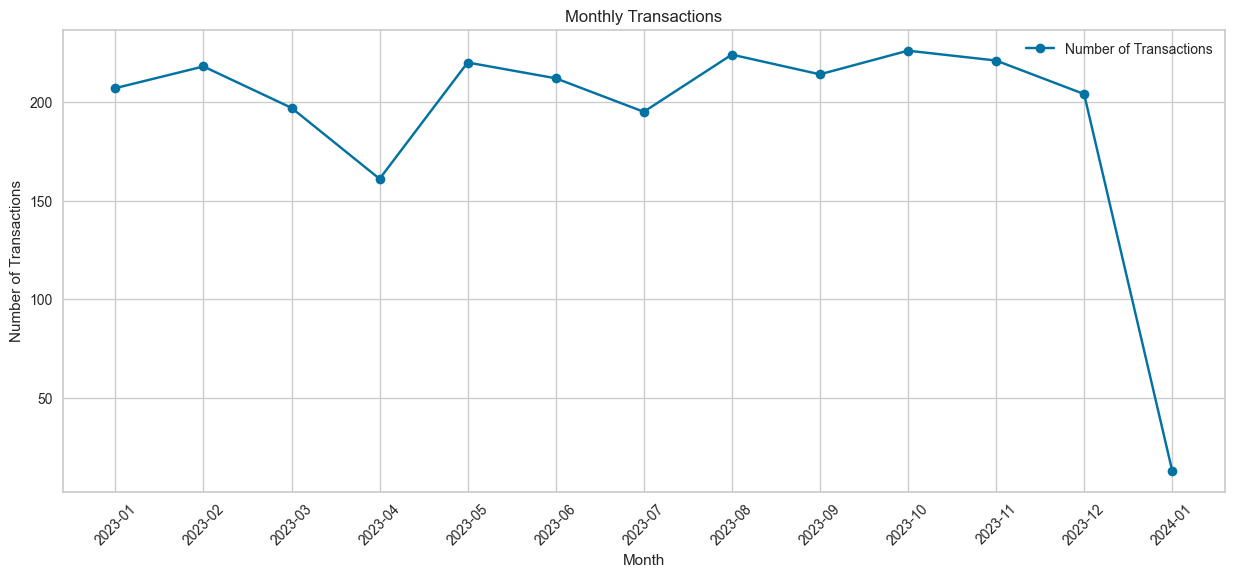

In [15]:
# Pastikan kolom tanggal dalam format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Ambil bulan dari kolom tanggal
monthly_trends = df.groupby(df['TransactionDate'].dt.strftime('%Y-%m')).size()

# Plot tren transaksi bulanan
plt.figure(figsize=(15, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-', color='b', label="Number of Transactions")

# Format plot
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transactions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

### Transactions Location

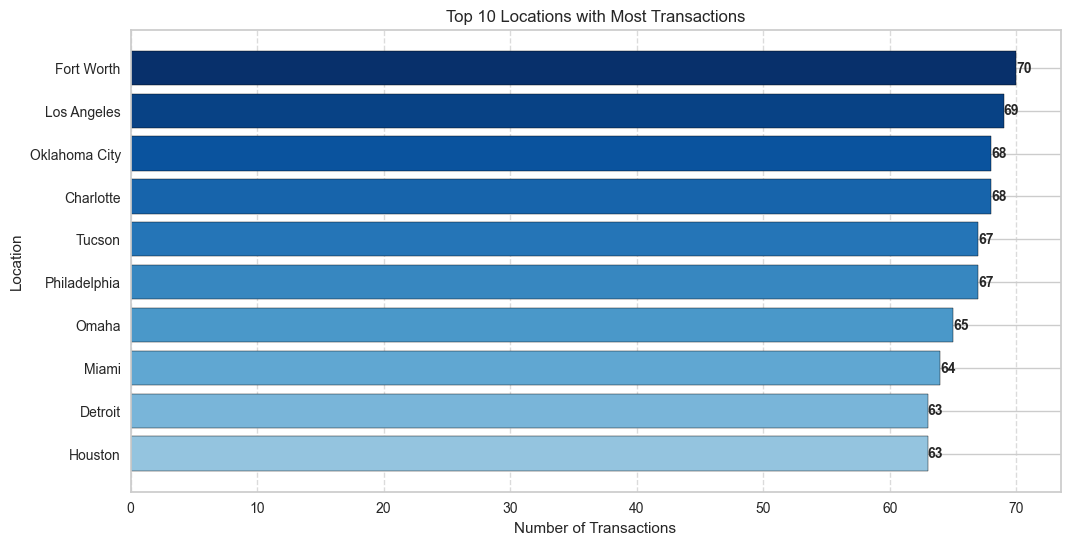

In [16]:
# Hitung jumlah transaksi untuk setiap lokasi, lalu ambil top 10
transactions_locations = df["Location"].value_counts().nlargest(10)

# Buat gradasi warna dari biru muda ke biru tua
colors = plt.cm.Blues(np.linspace(1, 0.4, len(transactions_locations)))

# Plot data dalam bentuk horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(transactions_locations.index, transactions_locations.values, color=colors, edgecolor="black")

# Tambahkan angka di ujung setiap batang
for bar in bars:
    plt.text(
        bar.get_width(),  # Posisi X (ujung batang)
        bar.get_y() + bar.get_height() / 2,  # Posisi Y (tengah batang)
        str(int(bar.get_width())),  # Teks angka
        ha="left",  # Horizontal alignment
        va="center",  # Vertical alignment
        fontsize=10,
        fontweight="bold"
    )

# Format plot
plt.xlabel("Number of Transactions")
plt.ylabel("Location")
plt.title("Top 10 Locations with Most Transactions")
plt.gca().invert_yaxis()  # Membalik sumbu Y agar ranking tertinggi di atas
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

# **5. Data Preprocessing**

Data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal

### Menangani Outlier

In [17]:
# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df[numerical_cols.columns].quantile(0.25)
Q3 = df[numerical_cols.columns].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = ((df[numerical_cols.columns] < lower_bound) | (df[numerical_cols.columns] > upper_bound)).sum()

print("\nJumlah outlier per kolom berdasarkan IQR:\n", outliers)


Jumlah outlier per kolom berdasarkan IQR:
 TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [18]:
# Filter data dengan kondisi outlier berdasarkan IQR
df_clean = df[~((df[numerical_cols.columns] < lower_bound) | (df[numerical_cols.columns] > upper_bound)).any(axis=1)]

# Cek jumlah data sebelum dan sesudah penghapusan outlier
print(f"\nJumlah data sebelum menghapus outlier: {df.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_clean.shape[0]}")

df_real = df_clean


Jumlah data sebelum menghapus outlier: 2512
Jumlah data setelah menghapus outlier: 2282


### Menghapus Fitur yang Kurang Penting Dan Berkorelasi

In [19]:
df_clean = df_clean.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'DeviceID', 'PreviousTransactionDate', 'TransactionDate', 'MerchantID', 'LoginAttempts', 'Location', 'Channel'])

### Encoding Data Kategorikal

In [20]:
label_cols = ['TransactionType', 'CustomerOccupation']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le 

### Standarisasi Fitur

In [21]:
numerical_cols = df_clean.select_dtypes(include=['number'])

# Standardization (Z-score)
standard_scaler = StandardScaler()
df_clean[numerical_cols.columns] = standard_scaler.fit_transform(numerical_cols)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2282 non-null   float64
 1   TransactionType      2282 non-null   float64
 2   CustomerAge          2282 non-null   float64
 3   CustomerOccupation   2282 non-null   float64
 4   TransactionDuration  2282 non-null   float64
 5   AccountBalance       2282 non-null   float64
dtypes: float64(6)
memory usage: 124.8 KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Membangun model clustering menggunakan Model K-means

In [22]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [23]:
# Pastikan hanya mengambil fitur numerik
X_features = df_clean.select_dtypes(include=['int32', 'float64'])
labels = kmeans.fit_predict(X_features)
df_clean['Cluster'] = labels

def analyze_clusters(X_original, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    
    # Ubah X_original ke DataFrame jika masih berbentuk array
    if isinstance(X_original, pd.DataFrame):
        X_original_df = X_original.copy()
    else:
        X_original_df = pd.DataFrame(X_original, columns=[f"Feature{i+1}" for i in range(X_original.shape[1])])
    
    X_original_df['Cluster'] = labels  
    
    for cluster_id in range(k):
        print(f"\nCluster {cluster_id + 1}:")
        
        # Data untuk cluster saat ini
        cluster_original_data = X_original_df[X_original_df['Cluster'] == cluster_id]
        
        print("  - Original Features:")
        for feature in X_original_df.columns[:-1]:  # Exclude 'Cluster' column
            mean_value = cluster_original_data[feature].mean()
            print(f"    {feature}: {mean_value:.2f}")

# Contoh pemanggilan fungsi:
analyze_clusters(X_features, labels, 3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
  - Original Features:
    TransactionAmount: 0.07
    TransactionType: 0.05
    CustomerAge: -1.21
    CustomerOccupation: 1.29
    TransactionDuration: 0.05
    AccountBalance: -0.93

Cluster 2:
  - Original Features:
    TransactionAmount: -0.04
    TransactionType: 0.54
    CustomerAge: 0.42
    CustomerOccupation: -0.48
    TransactionDuration: -0.01
    AccountBalance: 0.33

Cluster 3:
  - Original Features:
    TransactionAmount: 0.02
    TransactionType: -1.85
    CustomerAge: 0.46
    CustomerOccupation: -0.41
    TransactionDuration: -0.04
    AccountBalance: 0.34


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


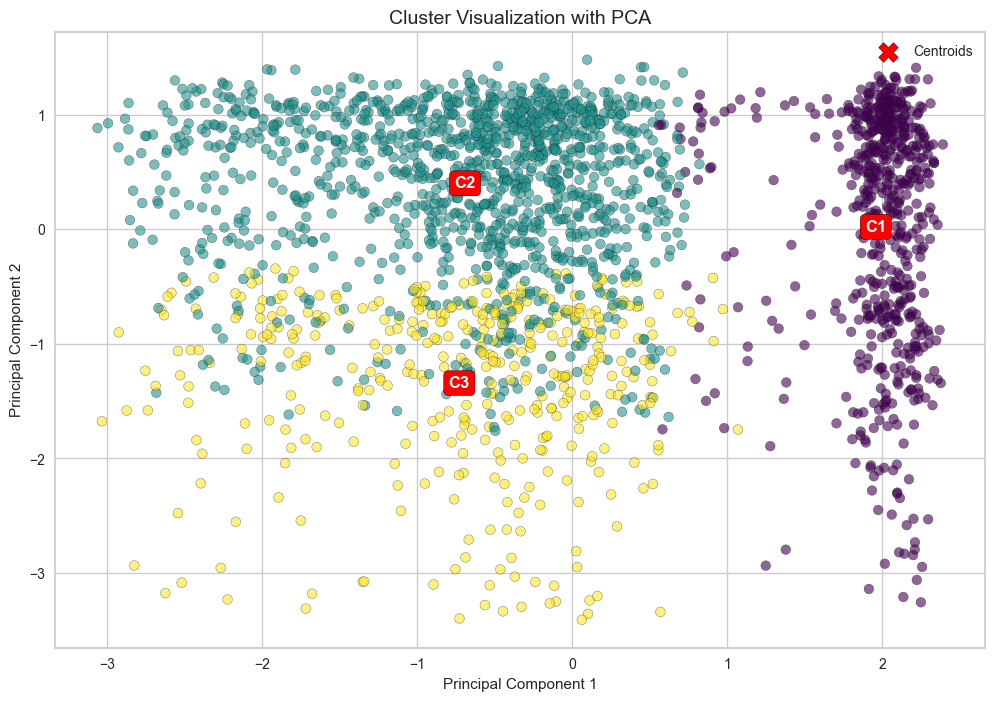

In [24]:
# Menghitung jarak setiap titik ke centroid klasternya
centroids = kmeans.cluster_centers_
df_clean['DistanceToCentroid'] = np.linalg.norm(X_features.to_numpy() - centroids[kmeans.labels_], axis=1)

# Reduksi Dimensi Menggunakan PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Proyeksikan centroids ke ruang PCA
centroids_pca = pca.transform(centroids)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Plot semua data dengan warna sesuai cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')

# Plot centroid cluster
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'C{i+1}', fontsize=12, fontweight='bold', ha='center', va='center', color='white',bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

# Judul dan label
plt.title("Cluster Visualization with PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Kita dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif.

### Metode Elbow

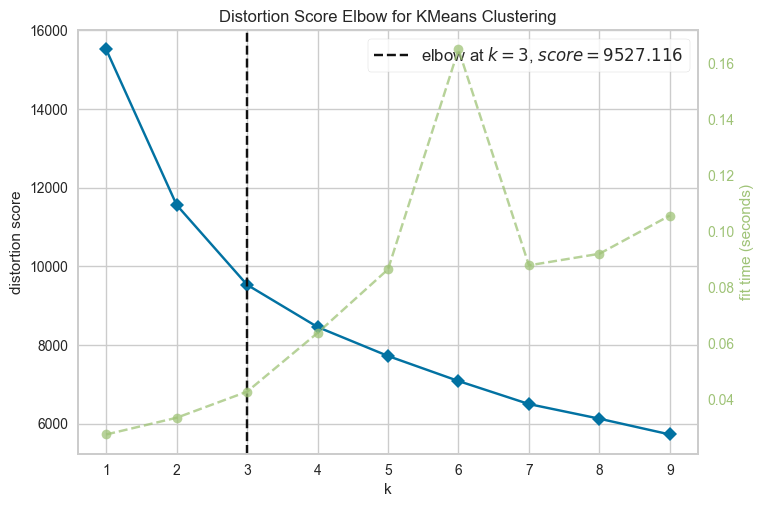

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Inisialisasi model KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_clean)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

### Silhouette Score

In [26]:
# Silhouette Score untuk menentukan jumlah cluster optimal 
silhouette_scores = []
cluster_range = range(2, 6)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_features)
    score = silhouette_score(X_features, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score:.4f}")

Jumlah Cluster: 2, Silhouette Score: 0.2569
Jumlah Cluster: 3, Silhouette Score: 0.2694
Jumlah Cluster: 4, Silhouette Score: 0.2289
Jumlah Cluster: 5, Silhouette Score: 0.2275


## **c. Feature Selection**

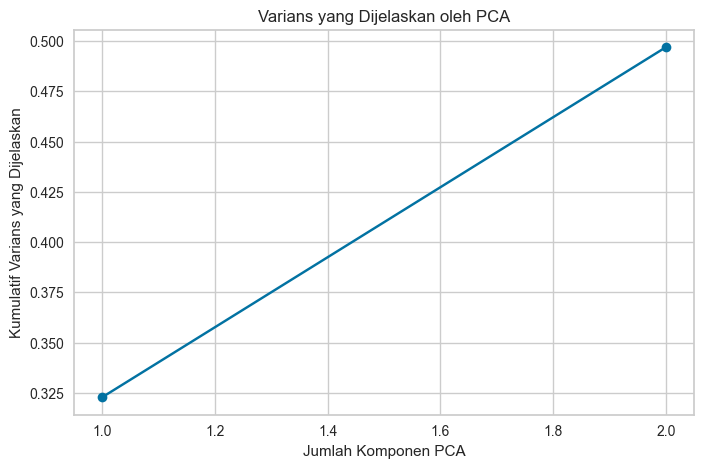

In [27]:
# Reduksi dimensi ke 2 untuk visualisasi
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_features)

# Visualisasi varians yang dijelaskan oleh PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_2d.explained_variance_ratio_) + 1), pca_2d.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("Varians yang Dijelaskan oleh PCA")
plt.show()

In [28]:
# Lakukan clustering dengan data hasil PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)

# Evaluasi dengan Silhouette Score
silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
print(f"Silhouette Score awal: {silhouette_scores[2]:.4f}")
print(f"Silhouette Score akhir: {silhouette_pca:.4f}")

Silhouette Score awal: 0.2289
Silhouette Score akhir: 0.4409


In [29]:
# Analisis setiap cluster setelah PCA
def analyze_clusters_pca(X_pca, labels, k):
    print("Analisis Karakteristik Setiap Cluster (dalam ruang PCA):")
    
    # Ubah X ke DataFrame untuk analisis yang lebih mudah
    X_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    X_df['Cluster'] = labels  
    
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_df[X_df['Cluster'] == cluster_id]
        
        print(f"\nCluster {cluster_id + 1}:")
        for feature in X_df.columns[:-1]:
            mean_value = cluster_data[feature].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

# Panggil fungsi analisis cluster
analyze_clusters_pca(X_pca_2d, labels_pca, 3)

Analisis Karakteristik Setiap Cluster (dalam ruang PCA):

Cluster 1:
Rata-rata PC1: -0.72
Rata-rata PC2: 0.65

Cluster 2:
Rata-rata PC1: 1.94
Rata-rata PC2: 0.04

Cluster 3:
Rata-rata PC1: -0.69
Rata-rata PC2: -1.17


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

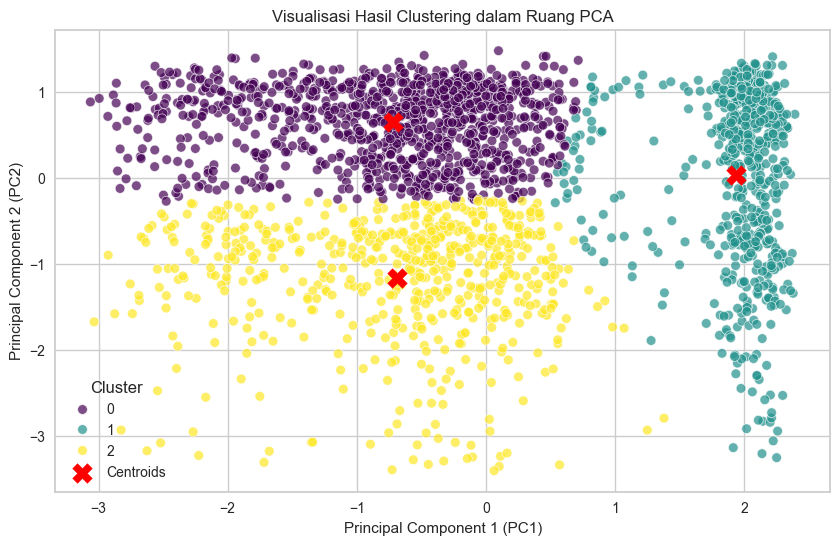

In [30]:
# Menambahkan label cluster ke dataframe hasil PCA
df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca

# Visualisasi hasil clustering dalam ruang PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca["PC1"], 
    y=df_pca["PC2"], 
    hue=df_pca["Cluster"], 
    palette="viridis", 
    alpha=0.7
)

# Menandai centroids cluster dalam ruang PCA
centroids_pca = kmeans_pca.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", marker="X", s=200, label="Centroids")

# Menampilkan plot
plt.title("Visualisasi Hasil Clustering dalam Ruang PCA")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Menambahkan Hasil Label Cluster ke DataFrame**

Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame.

In [31]:
# Tambahkan hasil label cluster ke DataFrame yang telah dinormalisasi
df_real['Cluster'] = labels_pca

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16168\3301094321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['Cluster'] = labels_pca


### Analisis Karakteristik Data

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
# Ringkasan statistik per-Cluster
print(df_real.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'std'],
    'AccountBalance': ['mean', 'median', 'min', 'max', 'std'],
    'TransactionDuration':  ['mean', 'median', 'min', 'max', 'std'],
    'TransactionType': lambda x: x.value_counts().to_dict(),
    'CustomerAge': lambda x: x.value_counts().to_dict(),
    'CustomerOccupation': lambda x: x.value_counts().to_dict(),
}))

        TransactionAmount                                   AccountBalance  \
                     mean  median   min     max         std           mean   
Cluster                                                                      
0              171.730912  143.12  0.32  499.99  127.899932    6478.785132   
1              265.344321  206.95  0.26  880.04  219.182588    1411.576023   
2              392.524448  414.49  2.03  903.19  265.076222    6469.379061   

                                                TransactionDuration         \
          median     min       max          std                mean median   
Cluster                                                                      
0        6378.21  120.89  14942.78  3508.262240          120.232143  111.0   
1        1052.31  101.25   9716.68  1580.864865          122.960720  116.0   
2        6258.63  184.72  14977.99  3697.298028          112.751236  108.0   

                                           TransactionType  \


**Hasil interpretasinya Kluster**
1. Cluster 1: Kelompok Konsumen Stabil dan Berpenghasilan Tinggi
2. Cluster 2: Kelompok Pelanggan Muda dan Bertransaksi Aktif
3. Cluster 3: Kelompok Pensiunan dan Profesional Berpenghasilan Tinggi

# Analisis Karakteristik Cluster dari Model KMeans

## Cluster 1:
- **TransactionAmount**: Rata-rata transaksi sekitar 171.73, dengan standar deviasi cukup tinggi (127.90), menunjukkan variasi jumlah transaksi dalam cluster ini.
- **AccountBalance**: Saldo rata-rata sangat tinggi (6478.79), menunjukkan kelompok ini memiliki kekuatan finansial yang stabil.
- **TransactionDuration**: Waktu transaksi relatif lebih tinggi (rata-rata 120 detik).
- **TransactionType**: Mayoritas transaksi dalam cluster ini adalah Debit.
- **CustomerAge**: Didominasi oleh kelompok usia 51-68 tahun, yang kemungkinan adalah kelompok pekerja senior atau pensiunan.
- **CustomerOccupation**: Banyak yang bekerja sebagai dokter, insinyur, atau pensiunan, profesi yang cenderung memiliki pendapatan tinggi. 
- **Analisis**: Cluster ini terdiri dari pelanggan dengan saldo besar, mayoritas transaksi bersifat debit, dan didominasi oleh orang dewasa atau pensiunan dengan pekerjaan profesional.

## Cluster 2:
- **TransactionAmount**: Rata-rata transaksi lebih tinggi dari Cluster 1 (265.34) dengan standar deviasi lebih besar (219.18), menunjukkan variasi transaksi yang lebih luas.
- **AccountBalance**: Saldo jauh lebih rendah (1411.57), kemungkinan besar pengguna memiliki keuangan lebih terbatas dibanding Cluster 1.
- **TransactionDuration**: Waktu transaksi sedikit lebih lama dari Cluster 1 (122.96 detik).
- **TransactionType**: Cluster ini memiliki transaksi Debit dan Credit, menunjukkan pola penggunaan yang lebih fleksibel.
- **CustomerAge**: Didominasi oleh kelompok usia 19-27 tahun, yang kemungkinan adalah kelompok muda dan pekerja awal karier.
- **CustomerOccupation**: Mayoritas pelanggan adalah Mahasiswa, diikuti oleh sedikit Insinyur dan Pensiunan.
- **Analisis**: Cluster ini mencerminkan pelanggan muda yang masih dalam tahap awal karier atau mahasiswa. Mereka memiliki saldo lebih kecil tetapi lebih aktif bertransaksi, dengan kombinasi Debit dan Credit.

## Cluster 3:
- **TransactionAmount**: Rata-rata transaksi tertinggi (392.52), dengan standar deviasi terbesar (265.18), menunjukkan variasi transaksi sangat tinggi.
- **AccountBalance**: Saldo rata-rata hampir sama dengan Cluster 1 (6469.37), menunjukkan stabilitas finansial.
- **TransactionDuration**: Waktu transaksi lebih cepat (112.75 detik), mungkin karena pengalaman atau preferensi digital yang lebih tinggi.
- **TransactionType**: Kombinasi transaksi Credit dan Debit, dengan lebih banyak transaksi kredit dibandingkan cluster lainnya.
- **CustomerAge**: Didominasi oleh kelompok 51-60 tahun, sebagian besar pensiunan.
- **CustomerOccupation**: Banyak yang bekerja sebagai Pensiunan, Dokter, dan Insinyur, yang umumnya memiliki pendapatan stabil atau investasi pasif.
- **Analisis**: Cluster ini berisi pelanggan dengan saldo besar dan kebiasaan transaksi tinggi. Mayoritas adalah pensiunan atau profesional yang masih aktif dengan penggunaan transaksi Debit dan Credit yang seimbang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [33]:
df_real.to_csv("Final_Dataset_Klasifikasi.csv", index=False)